In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [2]:
import pandas as pd
import numpy as np

## Describing a distribution
* Mean
* Median
* Variance
* Standard Deviation

Often statistical parameters provide important insight into the data - and can reveal information that is not visually obvious. However, it's important to consider their limitations as well and think about what is gained by visual exploration.

Outliers are a good place to start - visually they are easy to spot but they can have deceptive influence on statistical metrics. Consider [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), a set of four distributions with nearly identical aggregate properties:

In [3]:
aq = sns.load_dataset("anscombe")

In [4]:
print aq[aq['dataset'] == 'I'].describe()
print aq[aq['dataset'] == 'II'].describe()

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000


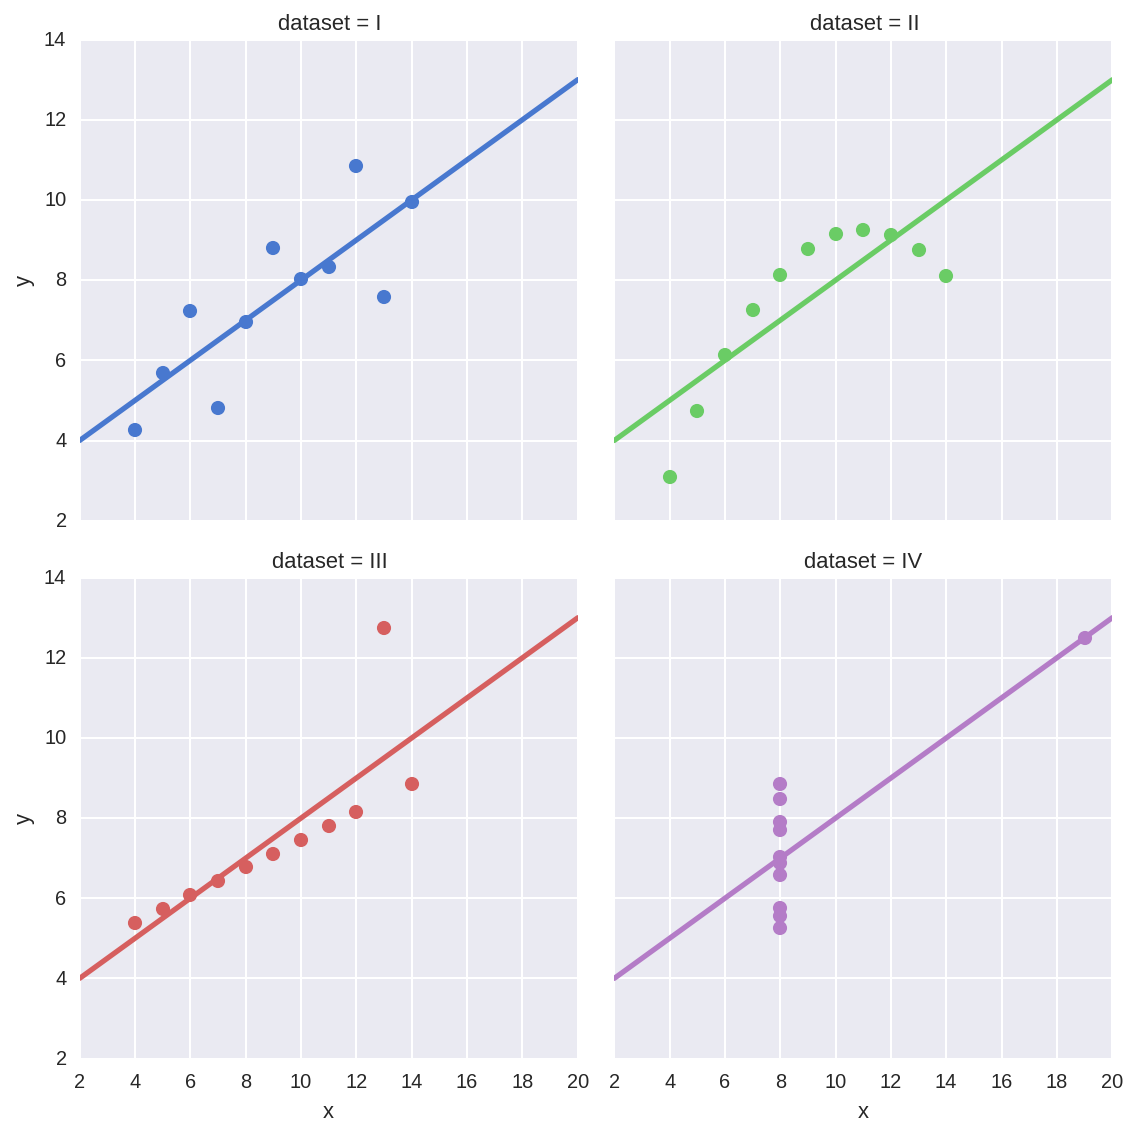

In [5]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=aq,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

*Question*: When can situation 4 arise in real life? What can be done to identify this kind of situation in the feature space?

*Question*: You're told that the mean starting salary for a Data Scientist is \$110,000. What are two **non-visual** methods of determining whether the distribution is normal or bimodal (with many positions at ~\$140k and many at ~\$80k)?

## Histograms

In [6]:
tips = sns.load_dataset("tips")

In [7]:
print tips.shape
tips[:5]

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


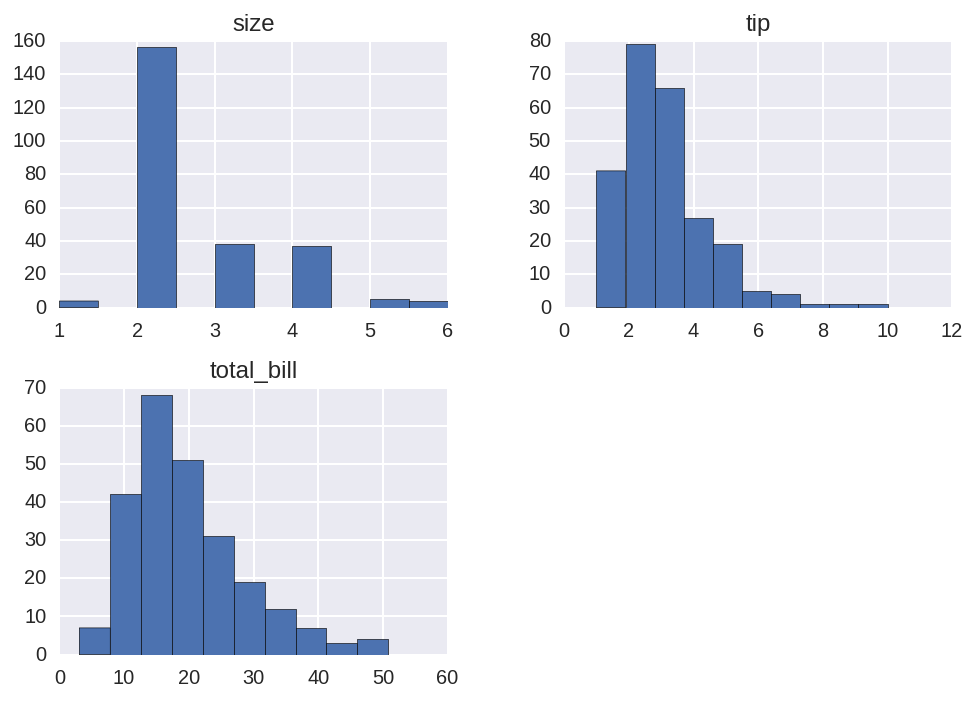

In [8]:
tips_hist = tips.hist()

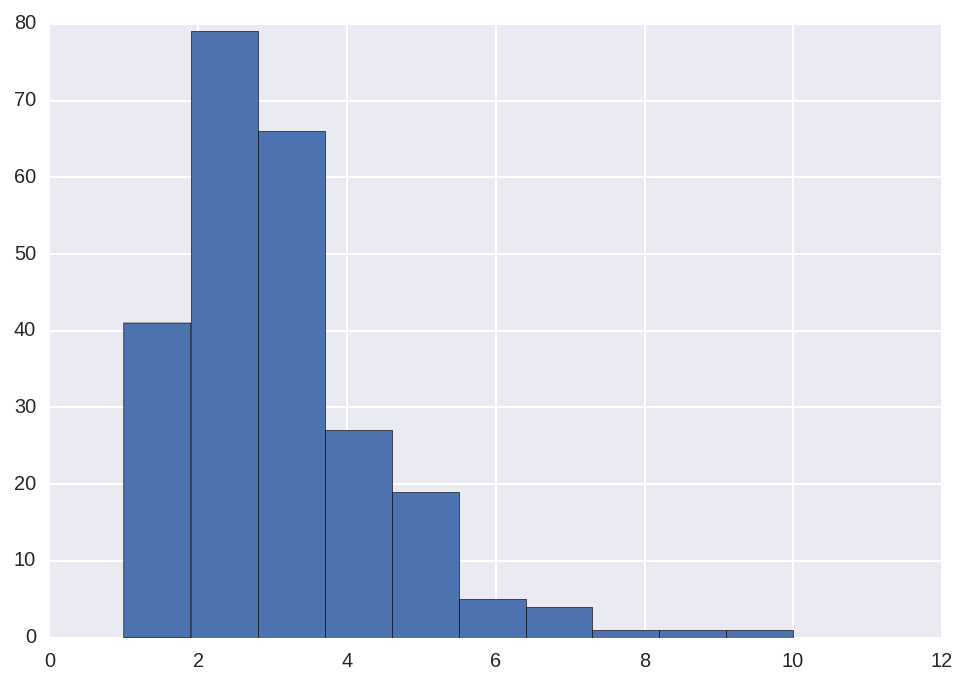

In [9]:
# Side note on saving figures to disk
# Won't work: tips_fig = tips_hist.get_figure()
tip_hist = tips['tip'].hist()
tips_fig = tip_hist.get_figure()

In [10]:
# these will work
# tips_fig.savefig('tiphist.png')
# tips_fig.savefig('tiphist.pdf')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f309c10e510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3096cfd3d0>]], dtype=object)

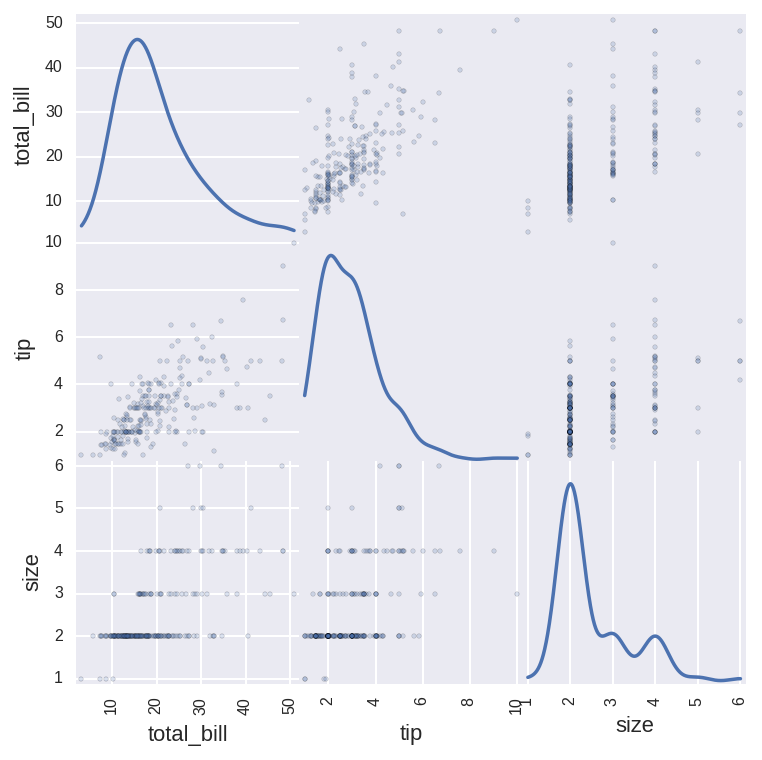

In [11]:
pd.scatter_matrix(tips, alpha=0.2, figsize=(6, 6), diagonal='kde')
# available in seaborn as pairplot()

### Further reading
For more information on kernel density estimation, check out these blog posts:
* [Michael Lerner's motivation of KDE based on histograms](http://www.mglerner.com/blog/?p=28)
* [A comparison of KDE methods in Python](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)

## Relationships between variables

### Linear correlation
The most common metric is [Pearson's](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) correlation coefficient (covariance normalized by the product of the standard deviations), which ranges between 1 being total positive correlation and -1 being total negative correlation.

In [16]:
tips.corr(method='pearson')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


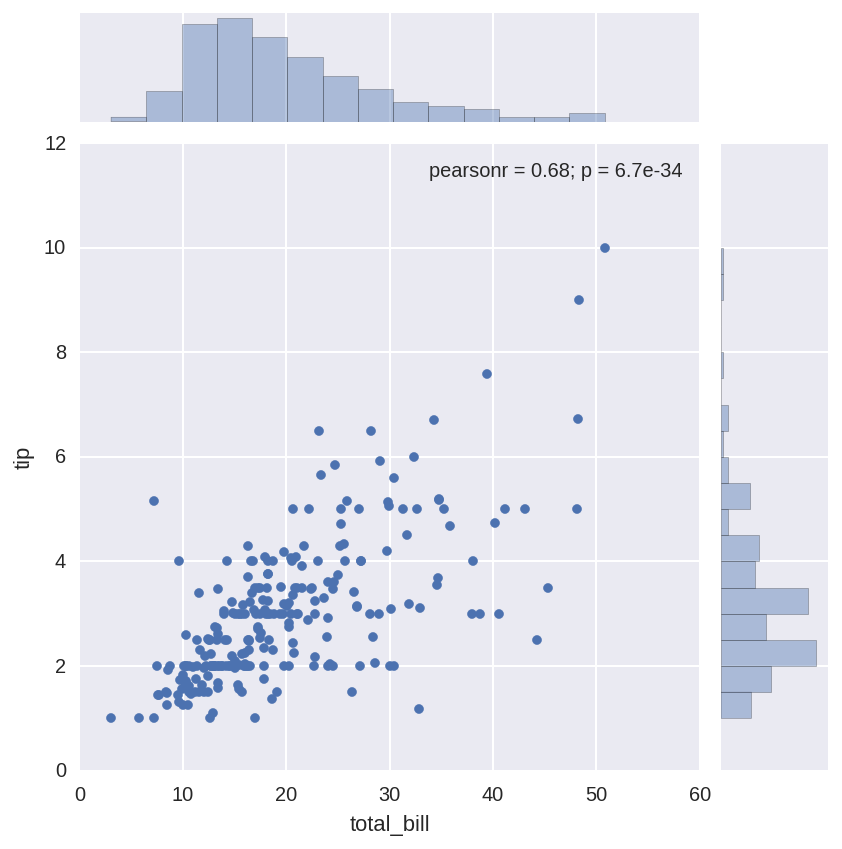

In [17]:
sns.jointplot(x='total_bill', y='tip', data=tips)

*Question*: Imagine you're trying to do some feature selection using Pearson's coefficient. What are two situations where this metric can be misleading?

### Indirect Influence / constraints
- e.g. speed is highly correlated with accidents only if driving on the highway
- This mostly boils down to intelligently looking at subsets of the data, edge cases, etc.
- Leave one out for predictive models

In [ ]:
print tips['tip'].mean()
print tips[tips['size'] > 1]['tip'].mean()
print tips[tips['size'] == 1]['tip'].mean()

*Question*: How meaningful is the above? What else do we need to consider?

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='time', data=tips, palette="Set2")

## Nonobvious patterns in the data
### Autocorrelation

In [12]:
from pandas.tools.plotting import autocorrelation_plot, lag_plot

In [13]:
# Get temperature data
temps_df = pd.read_csv("small_data/temperatures.csv", 
                       index_col=0,
                       names=["Temperature"],
                       parse_dates=True,
                       date_parser=lambda u: pd.datetime.strptime(u, "%Y-%m-%d %H:%M:%S"))

# get GOOG data
import simplejson as json

with open('small_data/goog.json') as raw_f:
    raw_data = raw_f.read()
    json_data = json.loads(raw_data)

json_data = json.loads(raw_data)
goog_df = pd.DataFrame(json_data['data'], columns=json_data['column_names'])

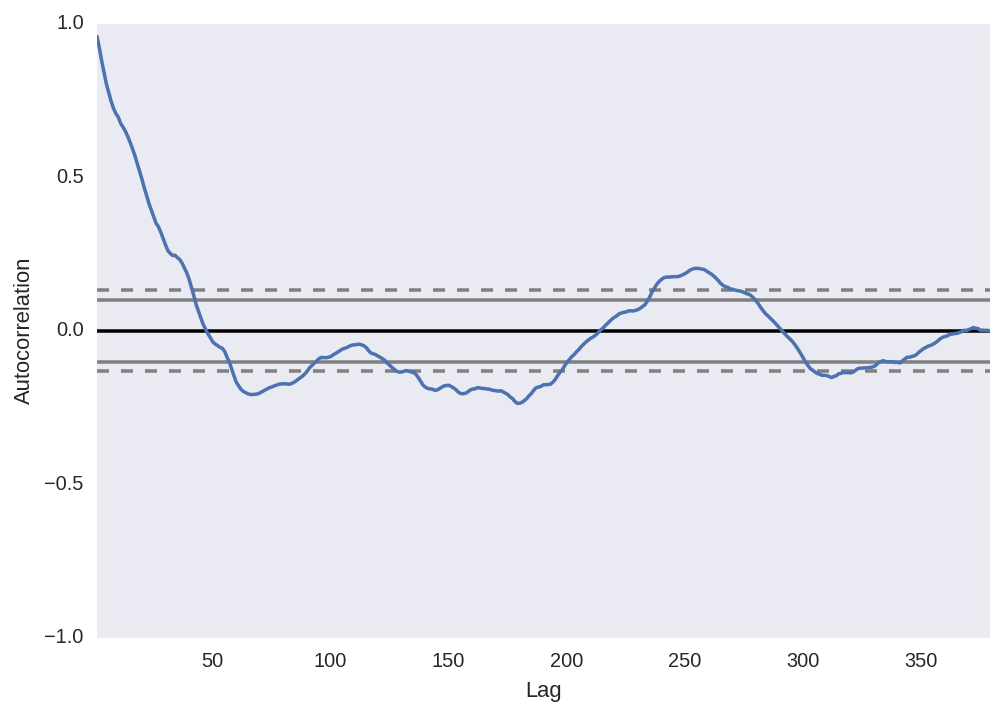

In [14]:
autocorrelation_plot(goog_df['Open'])

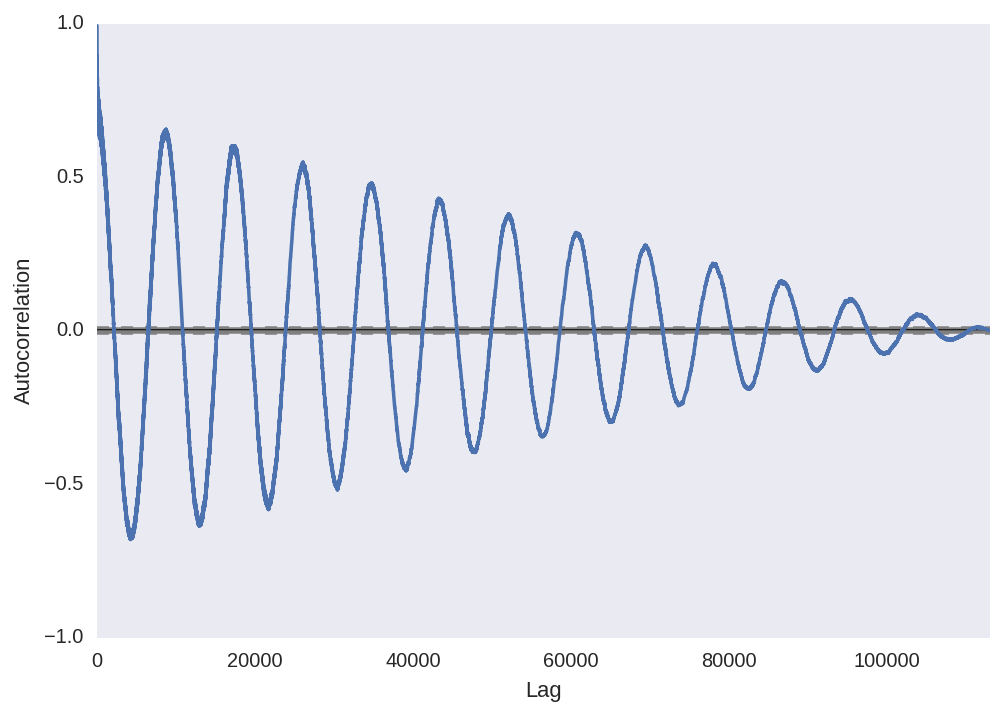

In [15]:
autocorrelation_plot(temps_df)

### FFT
Check out some time series analyses for FFT examples.

## Python visualization tools
* matplotlib (a [thorough rundown](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/) of its potential)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html) has its own useful plotting interface around matplotlib
* [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) (focuses on statistics, easier to customize than matplotlib)
* [bokeh](http://bokeh.pydata.org/en/latest/) (focus on interactivity, browser delivery)
* [ggplot](http://ggplot.yhathq.com/) for Python (attempt at porting R's beloved functionality)

### Answers
1. Categorical features with low representation
1. Quantiles, kurtosis, various statistical tests
1. Distributions like Anscombe's quartet, nonlinear relationships
1. Sample size

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*